# Class function for Simple Impute, 

In [71]:
#from my_class_univariate import myunivariate
import pandas as pd
import numpy as np
from my_class_univariate import myunivariate
dataset = pd.read_csv("placement_imputed.csv")

#split cat_cals, num_cals
cat_cals, num_cals= myunivariate.df_cat_num_split(dataset)
print(num_cals)

['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']


In [72]:
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

C:\Users\15016\AppData\Local\Temp\ipykernel_48592\2003394491.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['ssc_p'])


<Axes: xlabel='ssc_p', ylabel='Density'>

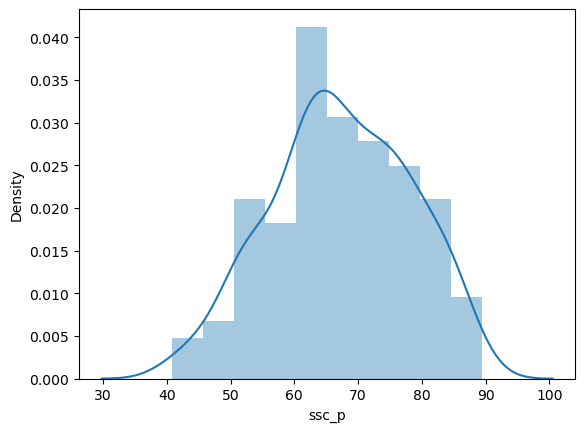

In [78]:
import seaborn as sns
sns.distplot(dataset['ssc_p'])


<Axes: xlabel='ssc_p', ylabel='Density'>

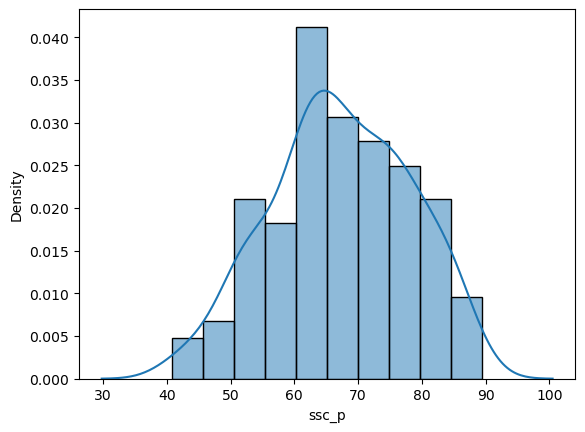

In [79]:
sns.histplot(
    dataset['ssc_p'], kde=True,
    stat="density", kde_kws=dict(cut=3)
)

Mean=67.303, Standard Deviation=10.827
The probability between range(40,50): 4.92 %


C:\Users\15016\AppData\Local\Temp\ipykernel_48592\977107793.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df,kde=True,kde_kws={'color':'blue'},color='green')


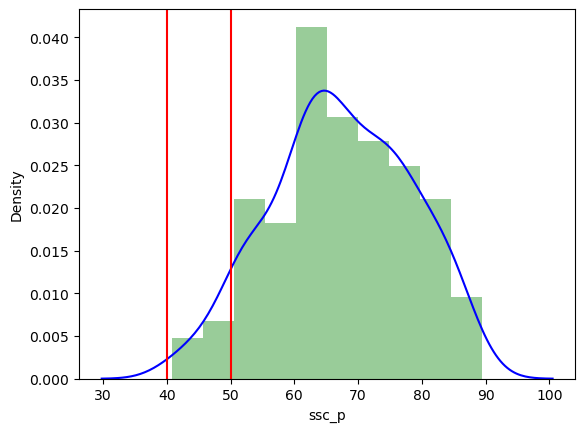

np.float64(0.04916705533695259)

In [85]:
def get_pdf_probability(df, startrange, endrange):
    import matplotlib.pyplot as plt
    import seaborn as sns
    from scipy.stats import norm

    # Plot histogram + KDE
    ax = sns.distplot(df,kde=True,kde_kws={'color':'blue'},color='green')
    plt.axvline(startrange, color='red')
    plt.axvline(endrange, color='red')

    # Calculate parameters
    sample_mean = df.mean()
    sample_std = df.std()
    print(f"Mean={sample_mean:.3f}, Standard Deviation={sample_std:.3f}")

    # Define normal distribution with estimated mean & std
    dist = norm(loc=sample_mean, scale=sample_std)

    # Probability between range using CDF
    prob = dist.cdf(endrange) - dist.cdf(startrange)
    print(f"The probability between range({startrange},{endrange}): {(prob*100):.2f} %")

    plt.show()
    return prob

get_pdf_probability(dataset['ssc_p'], 40, 50)

In [89]:
#normal For loop
mylist=[]
for val in range(1,10):
    mylist.append(val)
mylist

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [90]:
#one liner for loop
mylist1=[val for val in range(1,10)]
mylist1

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [101]:
# Hand on CDF
from statsmodels.distributions.empirical_distribution import ECDF
ecdf=ECDF(dataset["ssc_p"])
print(f"{ecdf(60):.2f} %")

0.24 %
